In [82]:
sample = c("W", "L", "W", "W", "W", "L",
            "W", "L", "W")
W = sum(sample=="W")
L = sum(sample=="L")

In [83]:
p = c(0, 0.25, 0.5, 0.75, 1)
ways = sapply(p, function(q) (q*4)^W*(4-4*q)^L)

In [84]:
ways

[1]   0  27 512 729   0

In [85]:
prob = ways/sum(ways);prob

[1] 0.00000000 0.02129338 0.40378549 0.57492114 0.00000000

In [86]:
cbind(p,ways,prob)

p,ways,prob
0.00,0,0.00000000
0.25,27,0.02129338
0.50,512,0.40378549
0.75,729,0.57492114
1.00,0,0.00000000


In [87]:
# Function to toss a globe covered p by water
# N times
simulation_globe_tossing = function(p=0.7, N=9) {
    sample(c("W","L"),size = N,prob = c(p, 1-p), replace=TRUE)
}

In [88]:
simulation_globe_tossing()

[1] "W" "W" "L" "L" "W" "W" "W" "L" "W"

In [89]:
replicate(simulation_globe_tossing(p=0.5, N=9), n=10)

W,W,L,W,L,L,W,L,W,L
L,W,L,L,W,L,L,W,L,W
L,L,L,L,L,W,W,L,L,L
L,L,W,L,L,W,W,L,L,L
L,L,L,W,L,L,W,W,L,L
L,W,L,W,W,L,W,W,W,L
L,W,W,W,W,L,L,W,W,W
W,W,L,W,L,W,L,L,L,W
L,W,W,W,L,W,L,L,W,W


In [90]:
# We can test the simulation on extreme settings
# To find any problems or bugs 
# For a large number of simulations and 
# proportion set to 0.5 we should get a value close to
# 0.5 for water in the set of simulations
lots_of_simulations = simulation_globe_tossing(p=0.5, N=1e4)
sum(lots_of_simulations == "W")/length(lots_of_simulations)

[1] 0.4985

In [91]:
# Now we can code the estimator\

# Function to compute the posterior distribution
compute_posterior = function(the_sample, 
                            possibilities = c(0, 0.25, 0.5, 0.75, 1)) {
    W = sum(the_sample=="W")
    L = sum(the_sample=="L")
    ways = sapply(p, function(q) (q*4)^W*(4-4*q)^L)
    post = ways/sum(ways)
    # bars = sapply(post, function(q) make_bar(q))
    data.frame(possibilities, ways, post=round(post,3))
                                }

In [92]:
compute_posterior(simulation_globe_tossing(p=0.7, N=200))

possibilities,ways,post
<dbl>,<dbl>,<dbl>
0.00,0.000000e+00,0
0.25,3.090315e+31,0
0.50,1.606938e+60,0
0.75,8.595045e+63,1
1.00,0.000000e+00,0


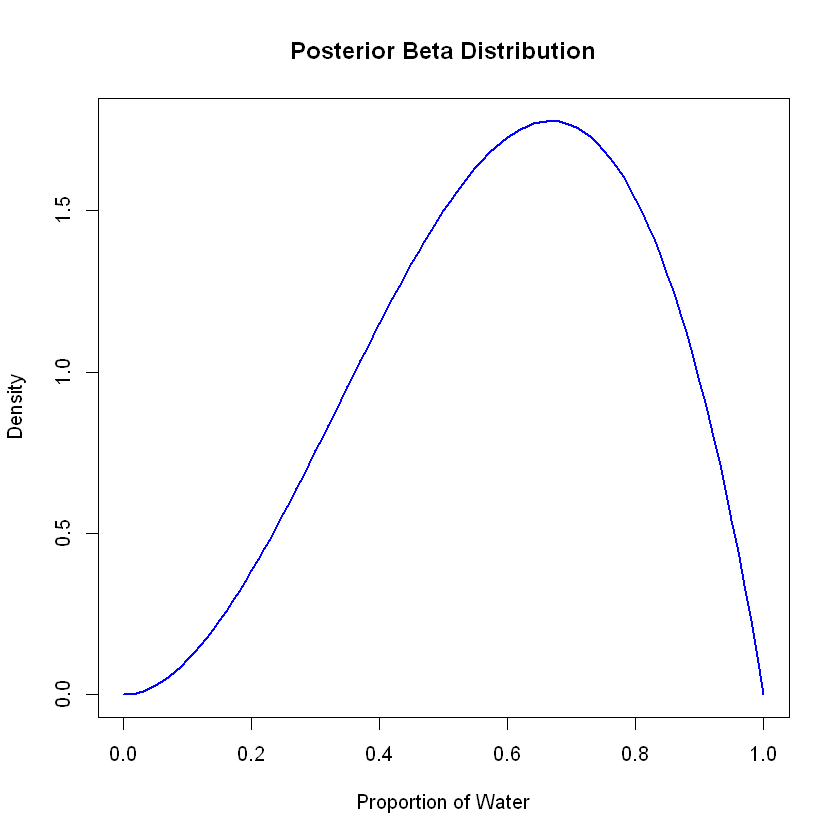

In [93]:
# Set prior parameters (assuming Beta(1,1) as the prior)
alpha <- 1
beta <- 1

# Update with observed data
W <- 2  # Number of water observations
L <- 1  # Number of land observations

# Posterior parameters
posterior_alpha <- alpha + W
posterior_beta <- beta + L

# Plot the posterior Beta distribution
curve(dbeta(x, posterior_alpha, posterior_beta), from = 0, to = 1,
      main = "Posterior Beta Distribution",
      xlab = "Proportion of Water",
      ylab = "Density",
      col = "blue", lwd = 2)

In [94]:
posterior_prob

[1] 0.5

In [95]:
p*(1-p)

[1] 0.0000 0.1875 0.2500 0.1875 0.0000

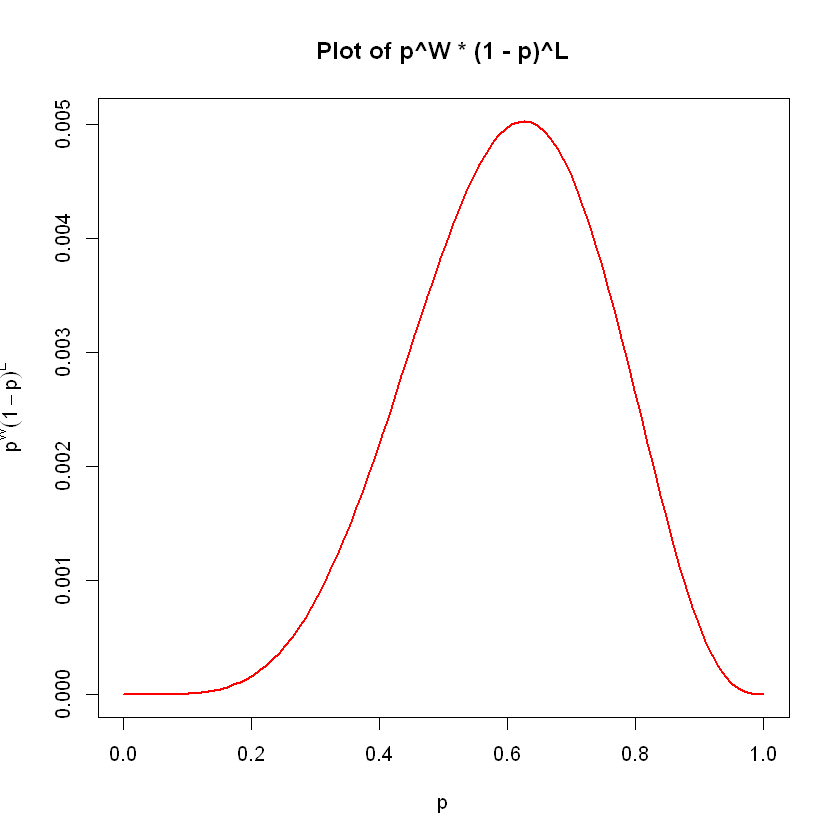

In [96]:
# Define the function with parameters W and L
f <- function(p, W, L) {
  p^W * (1 - p)^L
}

# Set W and L values
W <- 5
L <- 3

# Generate a sequence of p values from 0 to 1
p_vals <- seq(0, 1, length.out = 100)

# Compute the values of the function for each p with W and L specified
f_vals <- sapply(p_vals, f, W = W, L = L)

# Plot the function
plot(p_vals, f_vals, type = "l", col = "red", lwd = 2,
     main = "Plot of p^W * (1 - p)^L",
     xlab = "p", ylab = expression(p^W * (1 - p)^L))


In [97]:
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking@slim")


Installing packages into 'C:/Users/Kuba/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'coda' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mvtnorm'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Kuba\AppData\Local\R\win-library\4.3\00LOCK\mvtnorm\libs\x64\mvtnorm.dll to C:\Users\Kuba\AppData\Local\R\win-library\4.3\mvtnorm\libs\x64\mvtnorm.dll: Permission denied"
Warning message:
"restored 'mvtnorm'"


package 'devtools' successfully unpacked and MD5 sums checked
package 'loo' successfully unpacked and MD5 sums checked
package 'dagitty' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kuba\AppData\Local\Temp\RtmpikDeyY\downloaded_packages


Skipping install of 'rethinking' from a github remote, the SHA1 (cbcb8ba7) has not changed since last install.
  Use `force = TRUE` to force installation



In [98]:
library(rethinking)

In [99]:
# So we can sample from the posterior distribution say a 1000 samples of possible proportions of water
posterior_samples = rbeta(n=1000, 6+1, 3+1)
head(posterior_samples)


[1] 0.6218587 0.5631307 0.4357207 0.5152538 0.4817848 0.4417694

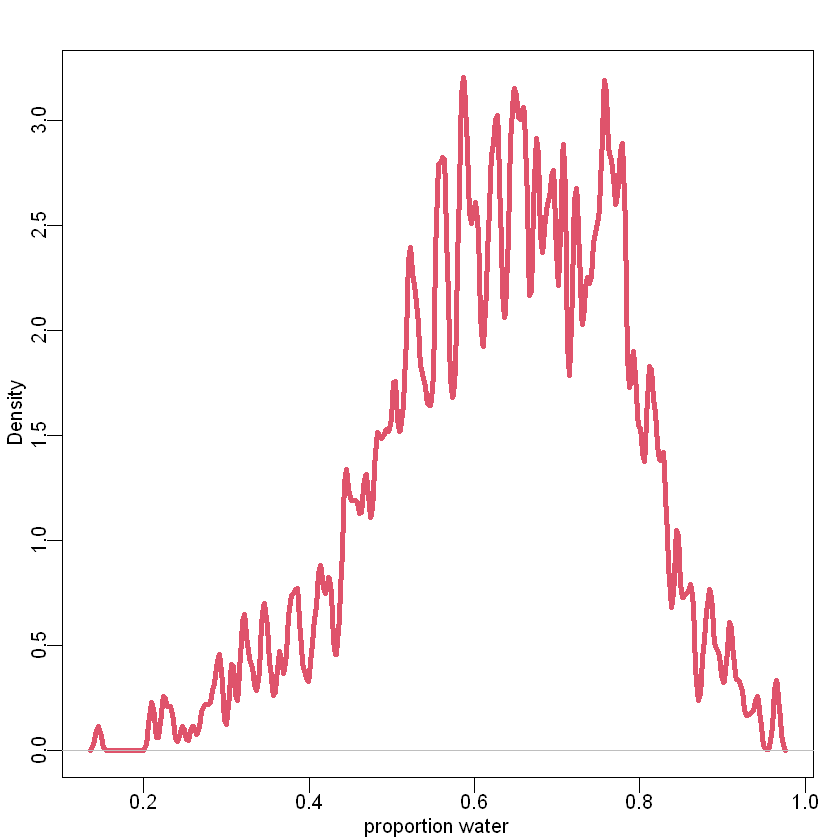

In [100]:
dens(posterior_samples, lwd=4, col=2, xlab='proportion water', adj=0.1)
# curve(dbeta(x,6+1, 3+1), add=T, lty=2, lwd=3)

In [101]:
# So what do we do with this sample?
# We can do posterior predictive distribution
# Posterior prediction is a prediction for a future experiment thats made from the existing estimate
# So we want to say given what we have learned about the globe so far, what would happen if we took
# more samples from it
# So we will get predictions about future samples
# so we can imagine taking 10 more tosses or whateva
# How many Ws we expect to see in the next 10 tosses

In [102]:
# So firstly we take these samples from the posterior distribution
# that is random samples of the proportion of water
# And then for EACH of these samples, we compute somethging called SAMPLING DISTRIBUTION or a PREDICTIVE DISTRIBUTION for possible experiments

In [103]:
# and then we can compute a POSTERIOR PREDICTIVE DISTRIBUTION that contains all the predictive distributions

In [112]:
# so lets look at this, we simulate the posterior predictive distribution
post_samples = rbeta(1e4, 6+1, 3+1)

pred_post = sapply(post_samples, function(p) sum(simulation_globe_tossing(p,10)=="W"))
tab_post =table(pred_post)
tab_post

pred_post
   0    1    2    3    4    5    6    7    8    9   10 
  20   85  247  552  904 1437 1755 1895 1645 1035  425 

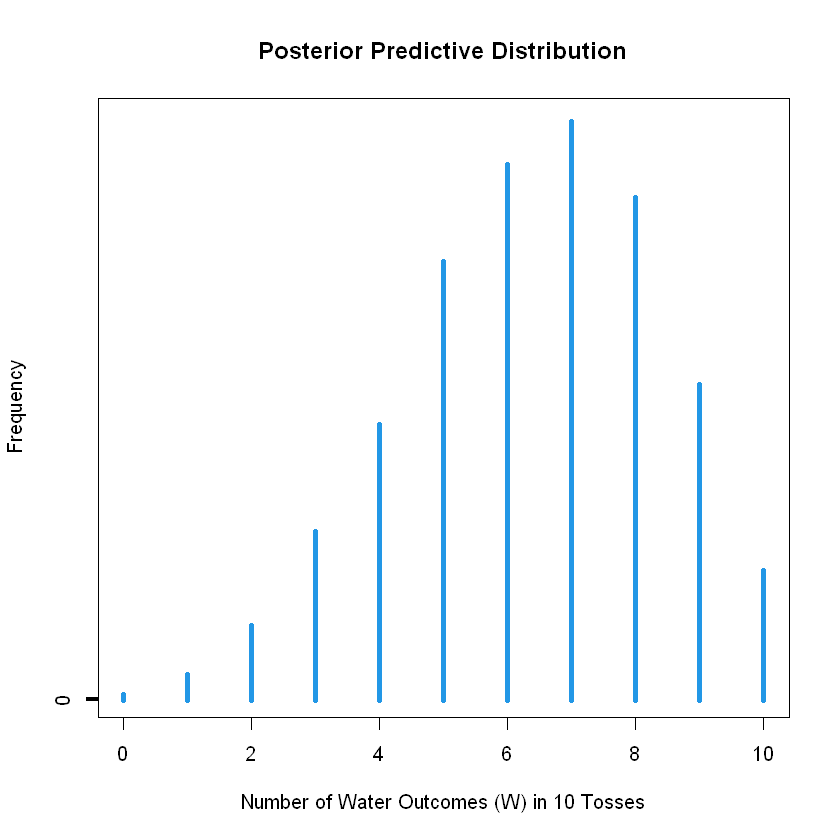

In [115]:
plot(0:10, tab_post, type = "h", lwd = 4, col = "blue",
     xlab = "Number of Water Outcomes (W) in 10 Tosses",
     ylab = "Frequency",
     main = "Posterior Predictive Distribution")

# Draw vertical lines for each outcome count
for (i in 0:10) {
  lines(c(i, i), c(0, tab_post[i + 1]), lwd = 4, col = 4)
}